# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



In [15]:
df = pd.read_csv('df_final.csv')
df.head()

y = df.mau
X = df.drop('mau', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

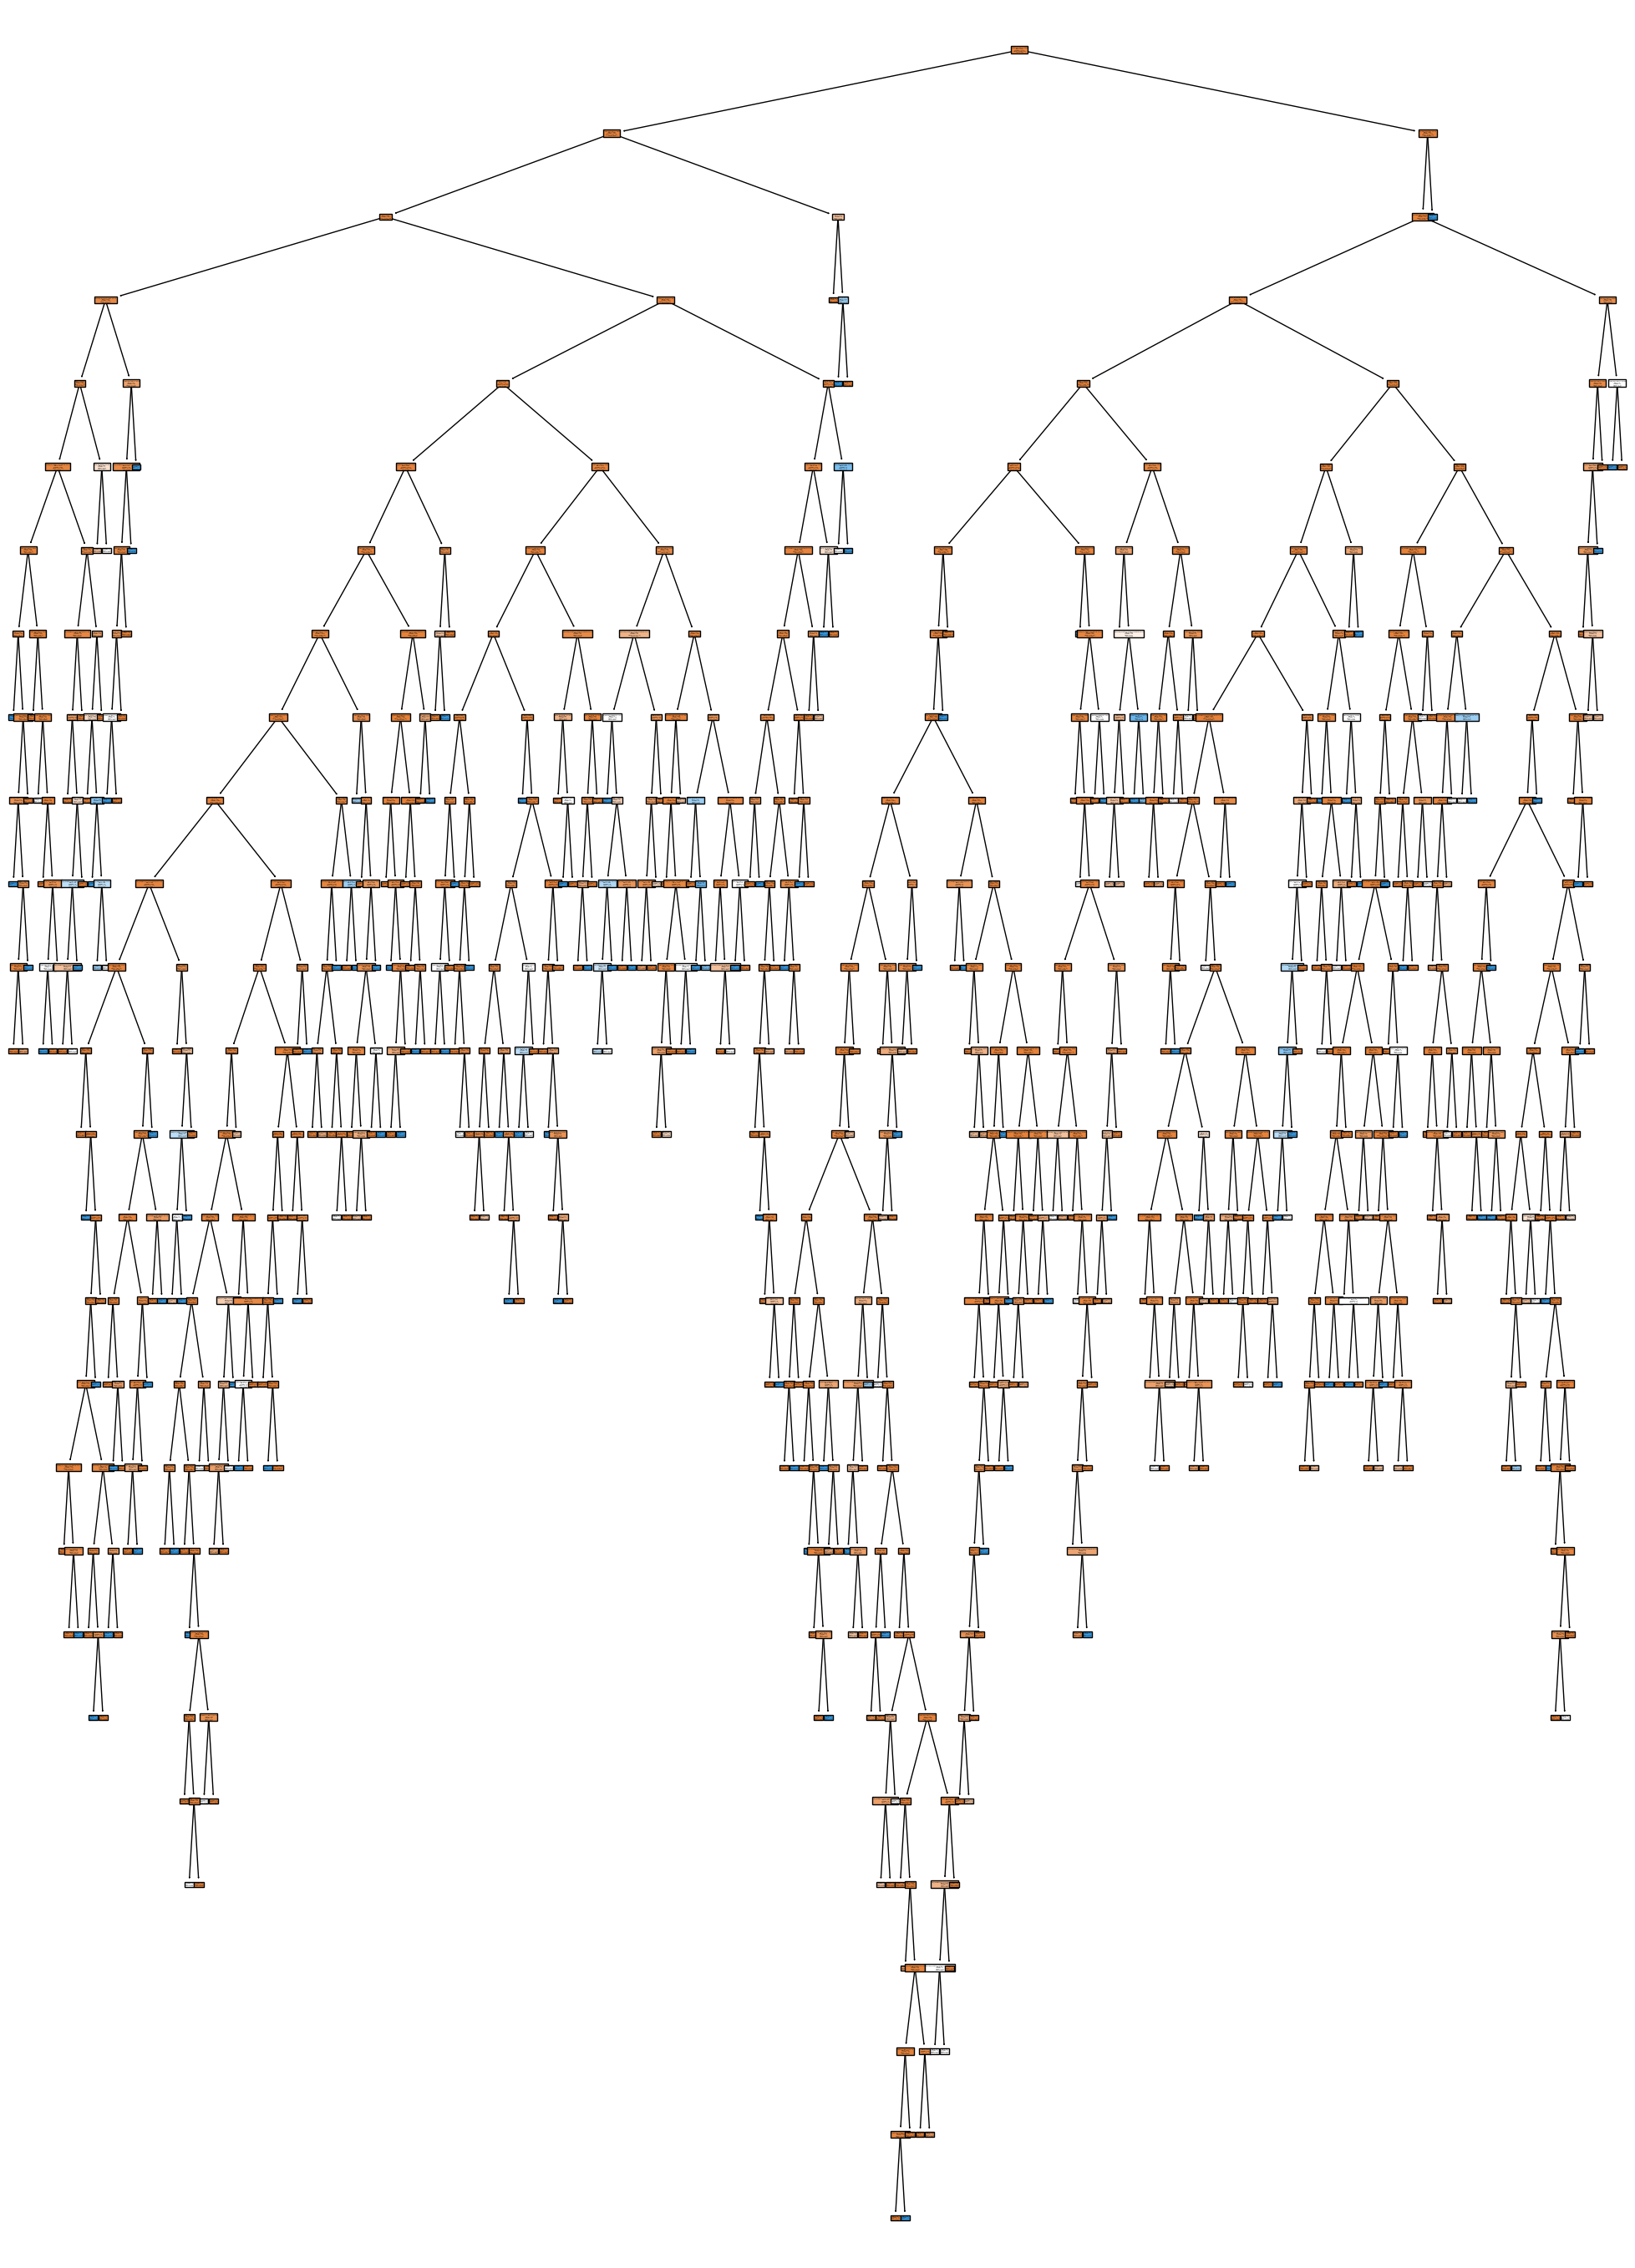

In [30]:
clf = DecisionTreeClassifier(random_state=100)
clf

clf.fit(X_train,y_train)
clf

plt.figure(figsize=(25, 35))
plot_tree(clf,
          filled=True,
          class_names=['mau', 'bom'],
          feature_names=list(X.columns));




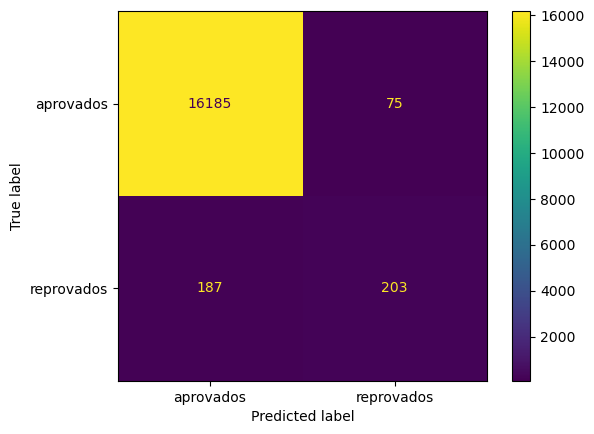

In [38]:
preditos = clf.predict(X)
cm = confusion_matrix(y, preditos, labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])

MatrizDeConfusao.plot()



In [48]:
predict= clf.predict(X_train)
accuracy_score(y_train, predict)

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

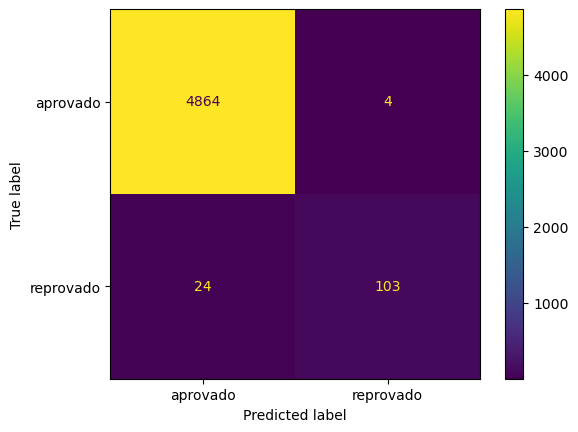

In [58]:
clf = DecisionTreeClassifier(random_state=100)
clf

clf.fit(X_test,y_test)
clf



cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovado', 'reprovado'])

MatrizDeConfusao.plot();

In [64]:
predict = clf.predict(X_test)
accuracy_score(y_test, predict) # A acurácia da base de teste é maior.


0.9943943943943944

0.9727727727727727

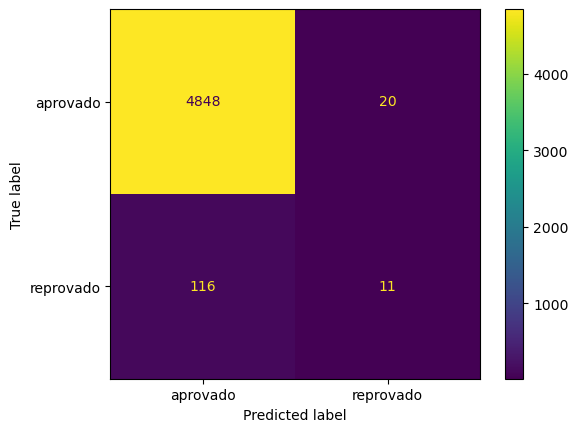

In [80]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train,y_train)
predict = clf.predict(X_test)

cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovado', 'reprovado'])

MatrizDeConfusao.plot();


accuracy_score(y_test, predict)
